In [1]:
import os, sys
from scipy import stats
import numpy as np
import pandas as pd

from scipy import stats

sys.path.insert(1, '../libs/')
from stat_lib import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Comparando-se o mesmo grupo muitas vezes

  - ANOVA
  - Tukey
  - Dunnett

### ANOVA - Analysis of variance

H0: Test for Equality of all means 
  - all random variable are drawn from the same distribution
  
Ha: At least one distribution has different mean (expectation)  
  - at least on random variable is drawn from a different distribution

https://en.wikipedia.org/wiki/One-way_analysis_of_variance

### ANOVA - uses the F-statistics to calculate if the sum of errors between and withing groups are similar (H0)


<font size="5">$F-stat = \frac{MS_B}{MS_W}$</font>

<br>

where

<font size="5">$Mean\ Square = MS = \frac{SS}{dof}$</font>

<br>
therefore,


<font size="5">$MS_B = \frac{SSE_B}{dof_B}$</font>

<font size="5">$MS_W = \frac{SSE_W}{dof_W}$</font>

<br> 

#### F-distribution

![f_distribuition wiki](../figure/f_distribuition_wiki.png)


### ANOVA - sum of erros within x between groups are the same?

  - What do you mean by error?
    - Error is the diference between a cell (single value) and each group mean
    - Another error is the difference between a group mean and the overall mean

### How to calculate it?

  - Calculate the means for each group (column) and overall mean
    
<br>  

![anova1](../figure/anova01.png)

<br>

### Lets calculate the means for each group (columns) (\<Yj>)
### and the overall mean - mean of all groups (\<Y>)

![anova1](../figure/anova02.png)

<br>

## Lets calculate the between groups sum of squared differences
  - is the sum, for each group, 
    - of the squared difference between the group mean less the overall mean
    - times the number of lines to achieve the group total difference
 
### Degree of freedom (dof or S)
  - number of groups - 1

<br>

![between groups](../figure/anova03.png)

## Lets calculate the within squared sum of errors
  - for each cell - its value - group mean
  - thereafter, you sum for each column, the squared values
  
### Degree of freedom (dof or f)
  - is the number of grous * (lines - 1)

<br>

![within sum of errors](../figure/anova04.png)

![within sum of errors](../figure/anova04b.png)

<br>

## Lets calculate the F-statistics for between over within groups

<br>

![anova1](../figure/anova05.png)

<br>

## Lets see the F-distribution 
  - dof = (2, 15)

<br>

![anova1](../figure/f-stat_result.png)

### Exercício:
  - Como você estimaria o p-value?
  - O que signfica este p-value?
  - Você consegue desenhar as 3 distribuições (3 grupos)?

### Novos exemplos
  - dadas 5 hipotéticas amostras
  - com media 140 e variando de 140 a 144
  - com SSD 10, variando de 10 a 10.4

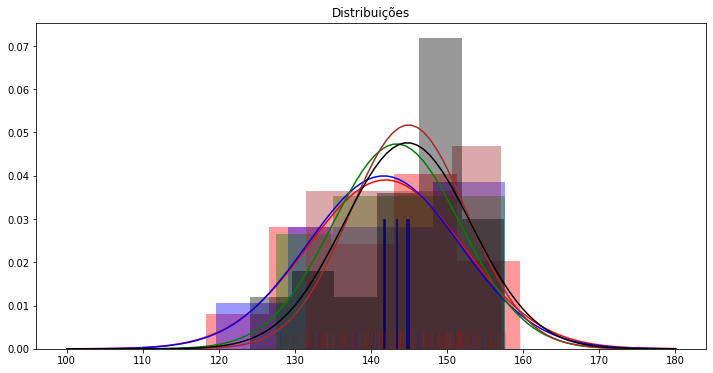

In [2]:
samps=[]; mus = []; sdvs = []
N   = 30
samples = 5
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black']

mu = 140; delmu = 1
sdv = 10; delsdv = .1

for i in range(samples):
    samps.append(np.random.normal(loc=mu, scale=sdv, size=N))
    mu += delmu
    sdv += delsdv

    mus.append(np.mean(samps[i]))
    sdvs.append(np.std(samps[i]))

fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(100, 180, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title);

### As distribuições são nomais? teste de Shaprio-Wilkis

In [3]:
for i in range(samples):
    ret1, text1, text_stat1, stat1, pvalue1 = test_normality_desc(samps[i])
    print(text1, text_stat1)

A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 5.15e-01 (NS)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 2.26e-01 (NS)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 5.62e-01 (NS)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 1.48e-01 (NS)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 1.15e-01 (NS)


### Alguma distribuição tem média diferente? one-way ANOVA

In [5]:
def test_one_way_ANOVA5 (samp1, samp2, samp3, samp4, samp5, alpha = 0.05):
    # teste de variancias de Fisher - one way ANOVA (analysis of variance)
    stat, pvalue = stats.f_oneway(samp1, samp2, samp3, samp4, samp5)

    if pvalue > alpha:
        text = 'As distribuições tem variâncias similares (não se rejeita a H0)'
        ret = True
    else:
        text = 'As distribuições não têm variâncias similares (rejeita-se a H0)'
        ret = False

    text_stat = 'p-value %.2e (%s)'%(pvalue, stat_asteristics(pvalue))

    return ret, text, text_stat, stat, pvalue

In [6]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samps[0],samps[1],samps[2],samps[3],samps[4])
text, text_stat

('As distribuições tem variâncias similares (não se rejeita a H0)',
 'p-value 4.91e-01 (NS)')

### Alterando somente a variância das distribuições:
  - as medias ficam inalteradas
  - os SSD variam [10, 30, 50, 70, 90]
  - o resultado é similar ao anterior!!!
  - porque?

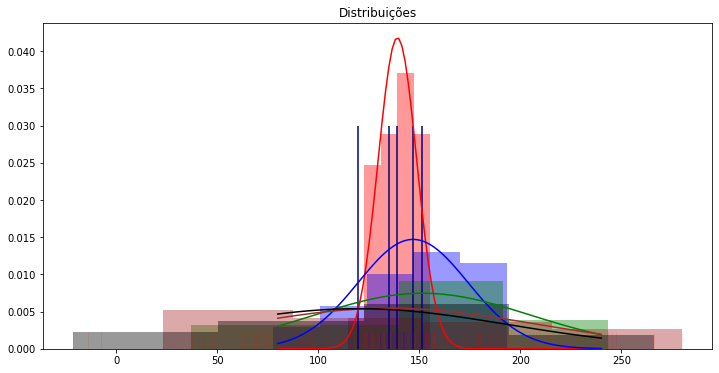

In [7]:
samps=[]; mus = []; sdvs = []
N   = 30
samples = 5
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black']

mu = 140; delmu = .5
sdv = 10; delsdv = 20

for i in range(samples):
    samps.append(np.random.normal(loc=mu, scale=sdv, size=N))
    mu += delmu
    sdv += delsdv

    mus.append(np.mean(samps[i]))
    sdvs.append(np.std(samps[i]))

fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(80, 240, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title);

In [8]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samps[0],samps[1],samps[2],samps[3],samps[4])
text, text_stat

('As distribuições tem variâncias similares (não se rejeita a H0)',
 'p-value 1.99e-01 (NS)')

### Alterando somente as medias das distribuições:
  - os SSD ficam inalterados
  - as medias variam [140, 150, 160, 170, 180]
  - o resultado é totalmente diferente
  - porque?

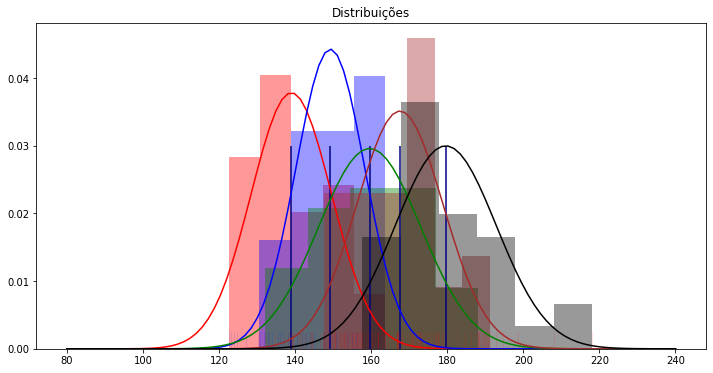

In [9]:
samps=[]; mus = []; sdvs = []
N   = 30
samples = 5
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black']

mu = 140; delmu = 10
sdv = 10; delsdv = .6

for i in range(samples):
    samps.append(np.random.normal(loc=mu, scale=sdv, size=N))
    mu += delmu
    sdv += delsdv

    mus.append(np.mean(samps[i]))
    sdvs.append(np.std(samps[i]))

fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(80, 240, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title);

In [10]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samps[0],samps[1],samps[2],samps[3],samps[4])
text, text_stat

('As distribuições não têm variâncias similares (rejeita-se a H0)',
 'p-value 1.97e-27 (***)')

### Tukey test - Post-hoc test 

É chamado de test de Tukey, ou método de Tukey, ou teste de significância honesta de Tukey
 
**POST-HOC** - depois disto

**ANOVA** diz se as distribuições são diferentes mas não diz qual e quanto.

https://en.wikipedia.org/wiki/Tukey%27s_range_test

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
df = pd.DataFrame([samps[0], [0]*N]).T
df.columns = ['val', 'group']

for i in range(1,5):
    dfa = pd.DataFrame([samps[i], [i]*N]).T
    dfa.columns = ['val', 'group']
    
    df = df.append(dfa)

df.shape, df.group.unique()

In [ ]:
plt.figure(figsize=(12,8), dpi=300)

cardata = MultiComparison(df.val, df.group)
results = cardata.tukeyhsd()

title  = "Tukey test: multiple comparisons between all pairs"

results.plot_simultaneous()
plt.title(title);

### Combinações

In [ ]:
for i in range(samples-1):
    for j in range(i+1, samples):
        print(i, j)

In [ ]:
results.meandiffs

In [ ]:
results.confint

In [ ]:
results.pvalues

In [ ]:
print(results.summary())

### Dunnett test

  - Um único controle
  - Múltiplos cases
  
Este é o caso quando queremos fazer um experimento de processo anti-inflamatório:
  - Temos uma cultura de células em PBS
  - Adicionamos um sinal inflmatório e medimos TNF após 30 min
  - Após uma hora adicionamos dexametasona e medimos TNF-A após 2 horas
  - Repetimos o experimento acima adicionando uma dada droga e medindo o TNF-A após 2 horas
  
    - Controle: PBS
    - Case: controle positivo - inflamação
    - Case: controle negativo - dexametazona
    - Cases: mais 3 cases com 3 outras drogas
  

In [ ]:
samps=[]; mus = []; sdvs = []
N   = 30
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black', 'gold']
sampNames = ['control', 'ctrl-pos', 'ctrl-neg', 'drg1', 'drg2', 'drg3']

mus  = [20, 400, 40, 420, 240,90]
sdvs = [10, 25,  10,  25,  20, 11]
samples = len(mus)

for i in range(samples):
    samps.append(np.random.normal(loc=mus[i], scale=sdvs[i], size=N))


fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(-20, 480, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, label=sampNames[i], color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, label=sampNames[i], color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title)
plt.legend;

### Barplot

In [ ]:
df2 = pd.DataFrame([samps[0], [sampNames[0]]*N]).T
df2.columns = ['val', 'group']

for i in range(1,samples):
    dfa = pd.DataFrame([samps[i], [sampNames[i]]*N]).T
    dfa.columns = ['val', 'group']
    
    df2 = df2.append(dfa)

df2.shape, df2.group.unique()

In [ ]:
plt.figure(figsize=(12,6))
ci = 95

ax = sns.barplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ci=ci)

for i in range(3):
    mu = np.mean(samps[i])
    plt.hlines(mu, 0, 6, color = colors[i])

plt.title("Teste de 3 drogas x controle pos e neg")
plt.ylabel('TNF-A (pmol)')
plt.xlabel('')

In [ ]:
sns.boxplot(x="group", y="val", data=df2, saturation=0.6, palette=colors);

In [ ]:
ci = 95

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10), sharey=True)

ret = sns.barplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ci=ci, ax=ax[0])

for i in range(3):
    mu = np.mean(samps[i])
    ax[0].hlines(mu, 0, 6, color = colors[i])
    
ax[0].set_ylabel('TNF-A (pmol)')
ax[0].set_xlabel('')
ax[0].set_title("Distribuições com n = %d"%(N))

wantLines = False
if wantLines:
    y1 = 150; del_y1 = 5; xmin=0; xmax=1
    ax[0].hlines(y=y1, xmin=xmin, xmax=xmax, colors='black')
    ax[0].text(x=.3, y=y1+del_y1, s=text_statH)

    y2 = 170; del_y2 = 5; xmin=1; xmax=2
    ax[0].hlines(y=y2, xmin=0, xmax=xmax, colors='black')
    ax[0].text(x=1+.3, y=y2+del_y2, s=text_statM)


seqx = np.linspace(-20, 480, 100)

for i in range(samples):
    retQ = sns.distplot(samps[i], kde=True, rug=True, norm_hist=True, label=sampNames[i], color=colors[i], vertical=True, rug_kws={"color": 'blue', "alpha": .1,}, ax=ax[1])
    # ax[1].vlines(mus[i], 0, hline, color = 'navy')
    
    # sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i], ax=ax[1])

ax[1].legend()

if wantLines:
    ax[1].hlines(y=muC, xmin=0, xmax=0.035, colors='black')
    ax[1].hlines(y=muH, xmin=0, xmax=0.03,  colors='black')
    ax[1].hlines(y=muM, xmin=0, xmax=0.03,  colors='black')

    ax[1].vlines(x=0.032, ymin=muC+erro0, ymax=muC-erro0, colors='black')
    ax[1].vlines(x=0.028, ymin=muH+erro1, ymax=muH-erro1, colors='black')
    ax[1].vlines(x=0.026, ymin=muM+erro2, ymax=muM-erro2, colors='black')

    ax[1].set_ylabel('')
    ax[1].set_xlabel('percentagem (%)')
    ax[1].set_title("distribuições");


sns.boxplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].set_title("box-plot");

In [ ]:
df2.group.unique()

In [ ]:
df2.head()

In [ ]:
try:
    os.mkdir('../tmp')
except:
    pass

df2.to_csv('../tmp/table.tsv', sep='\t', index=False)

In [ ]:
df3 = pd.read_csv('../tmp/table.tsv', sep='\t')
df3.head(3)